# Question 1

In [175]:
from PIL import Image

image = Image.open(r"test.jpg")#.convert("RGB")

mapping = list(map(lambda x: int(x[0]*.33 + x[1]*.33 + x[2]*.33), list(image.getdata())))

Greyscale_img = Image.new("L", (image.size[0], image.size[1]), 255)

Greyscale_img.putdata(mapping)

Greyscale_img.save('gray.jpg')

In [60]:
import numpy as np
import cv2
im = cv2.imread("test.jpg")
gray = (im[:, :, 0] * 0.33 + im[:, :, 1] * 0.33 + im[:, :, 2] * 0.33).astype(int)

bitmap = np.zeros(gray.shape, dtype=int)
index = np.where(gray >= 128)
bitmap[index[0], index[1]] = 255

from PIL import Image

img = Image.fromarray(bitmap).convert('1')
img.save('1-bit.bmp')


In [63]:
def image_dither(path, black='#000000', white='#ffffff'):
    image_rgb = read_image(path)
    image_gray = grayscale(image_rgb)
    image_bw = floyd_steinberg(image_gray)
    plot(layout([[
        plot(image_gray, palette=gray(256)),
        plot(image_bw, palette=[black, white])        
    ]]))
def floyd_steinberg(image):
    image = image.copy()
    distribution = np.array([7, 3, 5, 1], dtype=float) / 16
    u = np.array([0, 1, 1, 1])
    v = np.array([1, -1, 0, 1])
    
    for y in range(image.shape[0] - 1):
        for x in range(image.shape[1] - 1):
            value = np.round(image[y, x])
            error = image[y, x] - value
            image[y, x] = value
            image[y + u, x + v] += error * distribution
            
    image[:, -1] = 1
    image[-1, :] = 1
    return image
def grayscale(image):
    height, width, _ = image.shape
    
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] * .21 + \
            image[:, :, 1] * .72 + \
            image[:, :, 2] * .07
    
    return image.reshape(height, width)
def read_image(path, size=400):
    if path.startswith('https://'):
        image = Image.open(get(path, stream=True).raw)
    else:
        image = Image.open(path)
    
    width, height = image.size
    width, height = size, int(size * height / width)
    image = image.resize((width, height), Image.ANTIALIAS)
    
    data = image.getdata()
    assert data.bands in [3, 4], 'RGB or RGBA image is required'
    
    raw = np.array(data, dtype=np.uint8)
    return raw.reshape(height, width, data.bands)
def plot(image, palette):
    y, x = image.shape
    plot = figure(x_range=(0, x), y_range=(0, y), 
                  plot_width=x, plot_height=y)
    plot.axis.visible = False
    plot.toolbar_location = None
    plot.min_border = 0
    plot.image([np.flipud(image)], x=0, y=0, dw=x, dh=y,
               palette=palette)
    
    return plot

In [64]:
image_dither('test.jpg')

NameError: name 'layout' is not defined

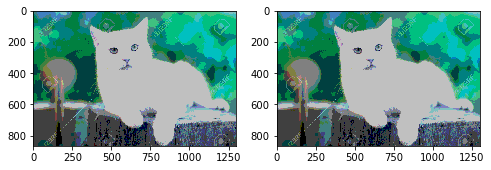

In [208]:
from PIL import Image
import numpy as np
import cv2

def floyd_steinberg(path):
    image = cv2.imread(path)
    image_with_error = image.copy()
    image_without_error = image.copy()
    distribution = np.array([7, 3, 5, 1], dtype=float) / 16
    u = np.array([0, 1, 1, 1])
    v = np.array([1, -1, 0, 1])
    
    for y in range(image.shape[0] - 1):
        for x in range(image.shape[1] - 1):
            old_color = image[y, x]
            new_color = findClosestPaletteColor(old_color)
#             value = np.round(image[y, x])
            error = old_color - new_color
            image_with_error[y, x] = new_color
            image_without_error[y, x] = new_color
            image_with_error[y + u, x + v] += (error * distribution[:, np.newaxis]).astype(np.uint8)
    return image_with_error, image_without_error
                
def findClosestPaletteColor(old_pixel):
        pallete = np.array([0, 64, 128, 192])
        diff = abs(old_pixel - pallete[:, np.newaxis])
        return pallete[np.argmin(diff, axis=0)]
        
        
        
with_error, without_error = floyd_steinberg('test.jpg')


# img1 = np.random.randint(10, size=(20, 20))
# img2 = np.random.randint(10, size=(20, 20))
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(with_error)
plt.imsave('with_error.jpg', with_error)
fig.add_subplot(1, 2, 2)
plt.imshow(without_error)
plt.imsave('without_error.jpg', without_error)
plt.show()






# img = Image.fromarray(floyd_steinberg('test.jpg'), 'RGB')
# img.show()
# img.save('output2-3.jpg')

        
        

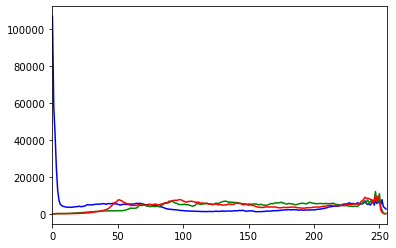

In [209]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [254]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg')

num_bits_red = 3
num_bits_green = 3
num_bits_blue = 2


red_channel = np.sort(img[:, :, 0].flatten())
green_channel = np.sort(img[:, :, 1].flatten())
blue_channel = np.sort(img[:, :, 2].flatten())
    
cuts = {}
cuts['red'] = []
cuts['blue'] = []
cuts['green'] = []


def median_cut(channel, channel_color, cuts, num_iterations, iteration)
    median = np.median(channel)
    cut = np.where(channel == median)[0][-1] + 1
    first_part = channel[0: cut]
    second_part = channel[cut: -1]
    if iteration < num_iterations:
        median_cut(first_part, channel_color, cuts, num_iterations, iteration + 1)
        median_cut(second_part, channel_color, cuts, num_iterations, iteration + 1)
    else:
        cuts[channel_color].append(first_part)
        cuts[channel_color].append(second_part)
        
median_cut(red_channel, 'red', cuts, 2 ** num_bits_red, 0)
median_cut(green_channel, 'green', cuts, 2 ** num_bits_green, 0)
median_cut(blue_channel, 'blue', cuts, 2 ** num_bits_blue, 0)

# red
for cut in cuts['red']:
    img[np.where(img[:, :, 0] <= cut[-1] and 0 <= img[:, :, 0])]
    


(560164,)
(560164,)
(560164,)
(560164,)
(560164,)
(560164,)
(560164,)
(560164,)


In [256]:
a = np.ones([3, 3, 3])
np.where(a[:, :, 0] == 1)

(array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2], dtype=int64))

In [136]:
i = np.zeros([3,3,3])
u = np.array([0, 0, 1, 1])
v = np.array([1, 0, 0, 1])
distribution = np.array([7, 3, 5, 1], dtype=float) / 16

In [137]:
i[u, v] += b[:, np.newaxis]

In [138]:
i

array([[[ 64.,  64.,  64.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.]],

       [[128., 128., 128.],
        [192., 192., 192.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]]])

In [192]:
a = np.array([1,191,3])
b = np.array([1, 64, 128, 192])

In [194]:
c = abs(a - b[:, np.newaxis])
b[np.argmin(c, axis = 0)]

array([  1, 192,   1])

In [92]:
np.min(c, axis = 0)

array([1, 2, 3])